In [124]:
# This dataset contains amazon customer reviews. This data only has the electronic gadgets manufactured by Amazon.
# the dataset contains reviews for various products.
# Te users give "reviews text" and "reviews rating" in range of 0-5. 
# Based on these ratings we categorize wether a review is positive or negative.
# There are some reviews whic as review text but not the rating score.
# The aim of the project is to find rating(positive or negative) for products where user as only given text review.

In [150]:
# Loading required packages and libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shivanisawai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [79]:
# Loading the data as Pandas dataframe
data = pd.read_excel("/Users/shivanisawai/Desktop/Data Mining/Amazon_reviews.xls")
data.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,1.0,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,1.0,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,1.0,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,1.0,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,1.0,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [80]:
# Summary of data
data.describe()
# We can see that the data has very few numerical variables and maximum are character variables 

,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,0.0,15939.000000,0.0,15953.000000,16355.000000,0.0,0.0
mean,NaN,0.952569,NaN,0.485175,4.487252,NaN,NaN
std,NaN,0.212565,NaN,7.806054,0.793690,NaN,NaN
min,NaN,0.000000,NaN,0.000000,1.000000,NaN,NaN
25%,NaN,1.000000,NaN,0.000000,4.000000,NaN,NaN
50%,NaN,1.000000,NaN,0.000000,5.000000,NaN,NaN
75%,NaN,1.000000,NaN,0.000000,5.000000,NaN,NaN
max,NaN,1.000000,NaN,730.000000,5.000000,NaN,NaN


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    16383 non-null  object 
 1   name                  16383 non-null  object 
 2   asins                 16381 non-null  object 
 3   brand                 16383 non-null  object 
 4   categories            16383 non-null  object 
 5   keys                  16383 non-null  object 
 6   manufacturer          16383 non-null  object 
 7   reviews.date          16370 non-null  object 
 8   reviews.dateAdded     14691 non-null  object 
 9   reviews.dateSeen      16383 non-null  object 
 10  reviews.didPurchase   0 non-null      float64
 11  reviews.doRecommend   15939 non-null  float64
 12  reviews.id            0 non-null      float64
 13  reviews.numHelpful    15953 non-null  float64
 14  reviews.rating        16355 non-null  float64
 15  reviews.sourceURLs 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124b27700>]],
      dtype=object)

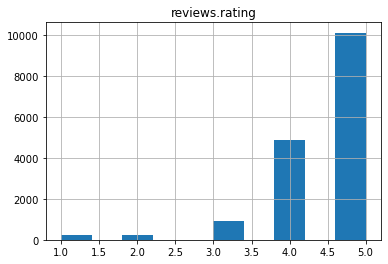

In [82]:
# Visualization of important parameters of the data:
# Histograms

data.hist(column = 'reviews.rating')

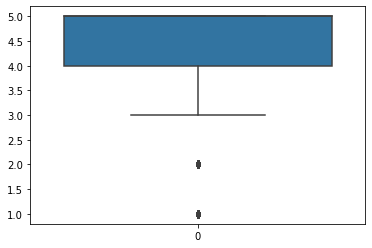

In [83]:
sns.boxplot(data = data['reviews.rating'])

In [84]:
# It can be seen that maximum products have high rating score of either 4 or 5 establishes that most customers are 
# happy with the product experience 

In [85]:
# Number of unique observations in each coumn:
data.nunique()
# asins seems to be a unique code associated with each product name but it is not the case. There are more than
# one products associated with same asin. 

id                         18
name                       20
asins                      17
brand                       1
categories                 17
keys                       18
manufacturer                1
reviews.date              816
reviews.dateAdded        1844
reviews.dateSeen          529
reviews.didPurchase         0
reviews.doRecommend         2
reviews.id                  0
reviews.numHelpful         50
reviews.rating              5
reviews.sourceURLs       4247
reviews.text            16374
reviews.title            9304
reviews.userCity            0
reviews.userProvince        0
reviews.username        13481
dtype: int64

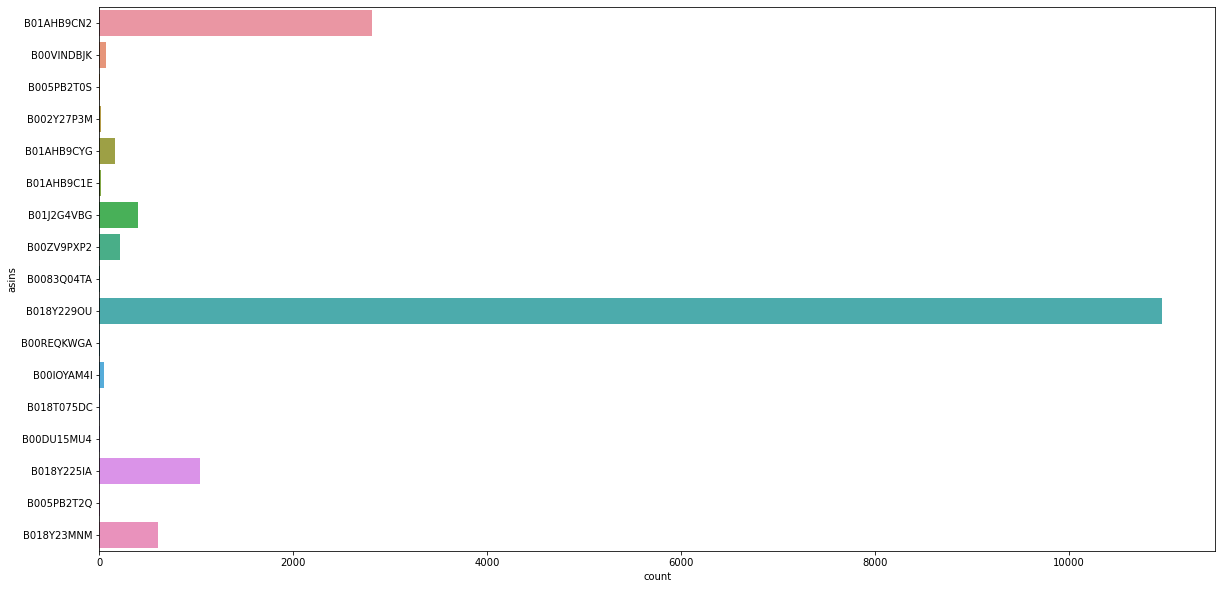

In [86]:
# Products with maximum reviews recieved
plt.figure(figsize = (20,10))
sns.countplot(y = data.asins, data = data)

In [87]:
# Names of products which have most number of reviews recieved
data.query("asins ==  'B018Y229OU'")

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
3695,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,1.0,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,"Good basic tablet for checking email , web bro...",Good,NaN,NaN,Jacques
3696,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,1.0,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,I love this tablet. It was a great buy. I woul...,Great tablet!,NaN,NaN,resolution516
3697,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,1.0,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,"Brought my old tablet in to my local store, an...",Good tablet for a low price.,NaN,NaN,AvatarRei
3698,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,1.0,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,Good Inexpensive tablet for someone that does ...,Good tablet for a beginner,NaN,NaN,blondia
3699,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,1.0,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,I got this for my niece. I would say this prod...,Great for kids,NaN,NaN,EliteOne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14656,AVphgVaX1cnluZ0-DR74,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2017-05-05T00:00:00.000Z,2017-07-02T14:41:17Z,2017-06-07T08:14:00.000Z,...,1.0,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,I bought this tablet for my grandson in 4th gr...,Great for a 4th grader,NaN,NaN,hoagy
14657,AVphgVaX1cnluZ0-DR74,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2017-05-05T00:00:00.000Z,2017-07-02T14:41:17Z,2017-06-07T08:14:00.000Z,...,1.0,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,I have bought 3 of these tablets for my great ...,great for children,NaN,NaN,oldblu
14658,AVphgVaX1cnluZ0-DR74,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2017-05-05T00:00:00.000Z,2017-07-02T14:41:17Z,2017-06-07T08:14:00.000Z,...,1.0,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,Bought this for my four year old niece and she...,Loved it,NaN,NaN,Jaime12341
14659,AVphgVaX1cnluZ0-DR74,Brand New Amazon Kindle Fire 16gb 7

In [88]:
# Extracting month from review date added column to understand which months have higest product reviews 
data["month"]= pd.DatetimeIndex(data['reviews.dateAdded']).month
data.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,month
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter,7.0
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman,7.0
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ,7.0
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks,7.0
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42,7.0


In [89]:
data.dtypes

id                       object
name                     object
asins                    object
brand                    object
categories               object
keys                     object
manufacturer             object
reviews.date             object
reviews.dateAdded        object
reviews.dateSeen         object
reviews.didPurchase     float64
reviews.doRecommend     float64
reviews.id              float64
reviews.numHelpful      float64
reviews.rating          float64
reviews.sourceURLs       object
reviews.text             object
reviews.title            object
reviews.userCity        float64
reviews.userProvince    float64
reviews.username         object
month                   float64
dtype: object

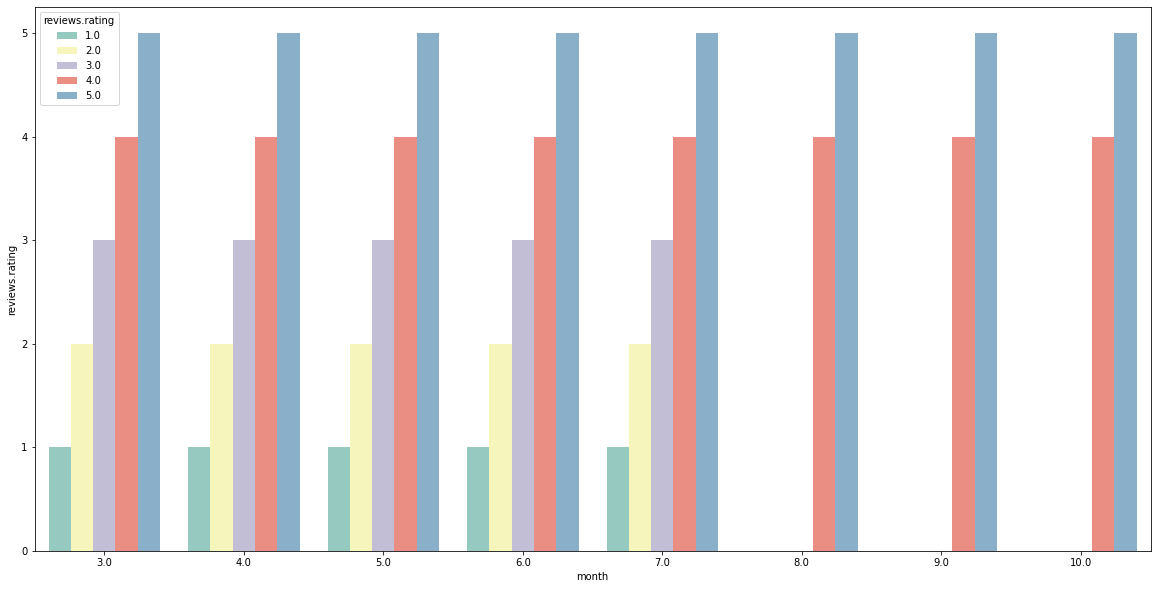

In [90]:
# Distribution of ratings in different months
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'month', y = 'reviews.rating', hue = 'reviews.rating', data = data, palette = "Set3")


In [91]:
# The aim of this project is to predict the ratings for "null" reviews or where users have only provided reviews text
# Checking all null reviews where values will be predicted:
new_null = data[data["reviews.rating"].isnull()]
print(new_null.isnull().sum()) #Checking for null values


id                       0
name                     0
asins                    0
brand                    0
categories               0
keys                     0
manufacturer             0
reviews.date             9
reviews.dateAdded       28
reviews.dateSeen         0
reviews.didPurchase     28
reviews.doRecommend     28
reviews.id              28
reviews.numHelpful      28
reviews.rating          28
reviews.sourceURLs       0
reviews.text             0
reviews.title            0
reviews.userCity        28
reviews.userProvince    28
reviews.username         0
month                   28
dtype: int64


In [92]:
# New data frame with null reviews rating:
new_null.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,month
2886,AVpfBEWcilAPnD_xTGb7,"Kindle Keyboard,,,\r\nKindle Keyboard,,,",B002Y27P3M,Amazon,"Kindle Store,Amazon Devices,Electronics","kindlekeyboard/b002y27p3m,amazon/d01101",Amazon,NaN,NaN,2015-12-14T00:00:00Z,...,NaN,NaN,NaN,http://www.amazon.com/Kindle-Wireless-Reader-W...,The Kindle is my first e-ink reader. I own an ...,"Worth the money. Not perfect, but very very go...",NaN,NaN,Jeffrey Stanley,NaN
2887,AVpfBEWcilAPnD_xTGb7,"Kindle Keyboard,,,\r\nKindle Keyboard,,,",B002Y27P3M,Amazon,"Kindle Store,Amazon Devices,Electronics","kindlekeyboard/b002y27p3m,amazon/d01101",Amazon,NaN,NaN,2015-10-19T00:00:00Z,...,NaN,NaN,NaN,http://www.amazon.com/Kindle-Wireless-Reader-W...,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",NaN,NaN,Matthew Coenen,NaN
2888,AVpfBEWcilAPnD_xTGb7,"Kindle Keyboard,,,\r\nKindle Keyboard,,,",B002Y27P3M,Amazon,"Kindle Store,Amazon Devices,Electronics","kindlekeyboard/b002y27p3m,amazon/d01101",Amazon,NaN,NaN,2015-12-08T00:00:00Z,...,NaN,NaN,NaN,http://www.amazon.com/Kindle-Wireless-Reader-W...,UPDATE NOVEMBER 2011:My review is now over a y...,Kindle vs. Nook (updated),NaN,NaN,Ron Cronovich,NaN
2889,AVpfBEWcilAPnD_xTGb7,"Kindle Keyboard,,,\r\nKindle Keyboard,,,",B002Y27P3M,Amazon,"Kindle Store,Amazon Devices,Electronics","kindlekeyboard/b002y27p3m,amazon/d01101",Amazon,NaN,NaN,2015-11-30T00:00:00Z,...,NaN,NaN,NaN,http://www.amazon.com/Kindle-Wireless-Reader-W...,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",NaN,NaN,Matthew Coenen,NaN
2890,AVpfBEWcilAPnD_xTGb7,"Kindle Keyboard,,,\r\nKindle Keyboard,,,",B002Y27P3M,Amazon,"Kindle Store,Amazon Devices,Electronics","kindlekeyboard/b002y27p3m,amazon/d01101",Amazon,NaN,NaN,2015-10-09T00:00:00Z,...,NaN,NaN,NaN,http://www.amazon.com/Kindle-Wireless-Reader-W...,I woke up to a nice surprise this morning: a n...,"Not the perfect do-it-all device, but very clo...",NaN,NaN,C. Tipton,NaN


In [93]:
# Checking all not null reviews rating and classifying them into positive and negative:
new_notnull = data[data["reviews.rating"].notnull()]
new_notnull.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,month
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter,7.0
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman,7.0
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ,7.0
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks,7.0
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42,7.0


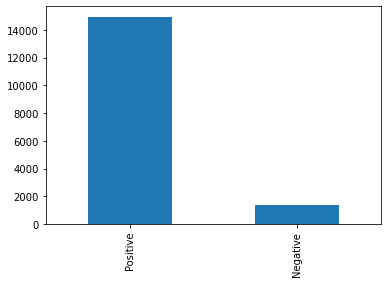

In [94]:
# Classifying into positive and negative reviews:
new_notnull["reviews.rating"] = new_notnull["reviews.rating"]>=4
new_notnull["reviews.rating"] = new_notnull["reviews.rating"].replace([True , False] , ["Positive" , "Negative"])
new_notnull["reviews.rating"].value_counts().plot.bar()

# It can be seen that we have an influence of more positive vallues thhan negative values

In [108]:
# Converting te reviews to text data:
new_null['reviews.text']=new_null['reviews.text'].astype(str)
new_notnull['reviews.text']=new_notnull['reviews.text'].astype(str)

In [109]:
# Cleaning of data to remove unwanted signs and unecessary words or URL:
def data_clean(cleaning):
    # Converting to lower case:
    cleaning.lower()
    # Removing #/@:
    cleaning = re.sub(r"#(\w+)", ' ', cleaning, flags=re.MULTILINE)
    cleaning = re.sub(r"@(\w+)", ' ', cleaning, flags=re.MULTILINE)
    # Removing URL:
    cleaning = re.sub(r"http\S+|www\S+|https\S+", '', cleaning, flags=re.MULTILINE)
    # Removing stop words:
    cleaning_words = word_tokenize(cleaning)
    nonstop_words = [w for w in cleaning_words if not w in stop]
    
    return " ".join(nonstop_words)

In [112]:
# Call function for data cleaning:
new_null['clean_review'] = new_null['reviews.text'].apply(data_clean)
new_notnull['clean_review'] = new_notnull['reviews.text'].apply(data_clean)

In [113]:
# Splitting the data into train and test:
split = new_notnull[["clean_review" , "reviews.rating"]]
train=split.sample(frac=0.8,random_state=200)
test=split.drop(train.index)

In [144]:
# There are many words occuring very frequently and it is important to understand the weight of these words. 
# Using tf idf transformer will help doing that:
# First, a vocabulary is built to store thhe words by using count_vectorize
# "min_df" removes the words which occur very less time

count_vect = CountVectorizer(min_df=3 ,stop_words=stop)
tfidf_transformer = TfidfTransformer()

X_train = count_vect.fit_transform(train["clean_review"])        
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
y_train = train["reviews.rating"]

X_test = count_vect.transform(test["clean_review"])
X_test_tfidf = tfidf_transformer.transform(X_test)
y_test = test["reviews.rating"]

# For prediction of null rating values:
predict = count_vect.transform(new_null["clean_review"])
predict_tfidf = tfidf_transformer.transform(predict)

In [145]:
# Using Multinomial Naive Bayes Model:
# model1 = MultinomialNB().fit(X_train_tfidf , train["reviews.rating"])
# prediction['Multinomial'] = model1.predict_proba(X_test_tfidf)

NB_model = MultinomialNB()
NB_model.fit(X_train_tfidf, y_train)
y_predict_nb = NB_model.predict(X_test_tfidf)
print(accuracy_score(y_test, y_predict_nb))
print(classification_report(y_test,y_predict_nb))


0.9177621522470193
              precision    recall  f1-score   support

    Negative       0.60      0.02      0.04       271
    Positive       0.92      1.00      0.96      3000

    accuracy                           0.92      3271
   macro avg       0.76      0.51      0.50      3271
weighted avg       0.89      0.92      0.88      3271



In [156]:
# Predicting the review ratings based on review text:
new_null["rating"] = NB_model.predict(predict_tfidf)
new_null[["id", "reviews.text", "rating"]].head()
# We can see in rating column thhat based on te review text we hhave predicted wether the review is positive or not

,id,reviews.text,rating
2886,AVpfBEWcilAPnD_xTGb7,The Kindle is my first e-ink reader. I own an ...,Positive
2887,AVpfBEWcilAPnD_xTGb7,"I'm a first-time Kindle owner, so I have nothi...",Positive
2888,AVpfBEWcilAPnD_xTGb7,UPDATE NOVEMBER 2011:My review is now over a y...,Positive
2889,AVpfBEWcilAPnD_xTGb7,"I'm a first-time Kindle owner, so I have nothi...",Positive
2890,AVpfBEWcilAPnD_xTGb7,I woke up to a nice surprise this morning: a n...,Positive


In [153]:
# Regression model:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
y_predict_lr = LR_model.predict(X_test)
print(accuracy_score(y_test, y_predict_lr))
print(classification_report(y_test,y_predict_lr))

0.9195964536838888
              precision    recall  f1-score   support

    Negative       0.53      0.25      0.34       271
    Positive       0.94      0.98      0.96      3000

    accuracy                           0.92      3271
   macro avg       0.73      0.62      0.65      3271
weighted avg       0.90      0.92      0.91      3271



In [157]:
# Predicting the review ratings based on review text:
new_null["rating"] = LR_model.predict(predict_tfidf)
new_null[["id", "reviews.text", "rating"]].head()

,id,reviews.text,rating
2886,AVpfBEWcilAPnD_xTGb7,The Kindle is my first e-ink reader. I own an ...,Positive
2887,AVpfBEWcilAPnD_xTGb7,"I'm a first-time Kindle owner, so I have nothi...",Positive
2888,AVpfBEWcilAPnD_xTGb7,UPDATE NOVEMBER 2011:My review is now over a y...,Positive
2889,AVpfBEWcilAPnD_xTGb7,"I'm a first-time Kindle owner, so I have nothi...",Positive
2890,AVpfBEWcilAPnD_xTGb7,I woke up to a nice surprise this morning: a n...,Positive


In [ ]:
# Using the above predicted values we can analyze which products are doing well in market and which are not
# Based on this the marketing or products can be done 
# The products with positive reviews can be placed first on pages when a user searches them